shows a flower image with both the foreground and background are in focus.
(a) Use grabCut to segment the image. Show the final segmentation mask, foreground image, and
background image.


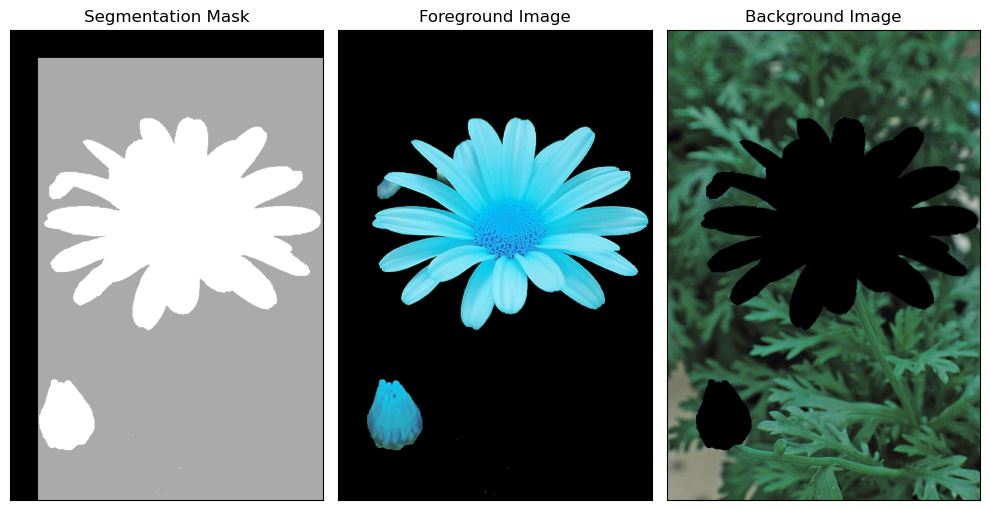

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the flower image
image = cv2.imread('images\en3160_assignment_01_Page_4_Image_0001.jpg')

# Create a mask and initialize with zeros
mask = np.zeros(image.shape[:2], np.uint8)

# Define the rectangle around the flower to specify the initial foreground area
rect = (50, 50, image.shape[1] - 50, image.shape[0] - 50)

# Apply GrabCut algorithm
cv2.grabCut(image, mask, rect, None, None, 5, cv2.GC_INIT_WITH_RECT)

# Modify the mask to get binary values for foreground and background
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Apply the mask to the original image
segmented = image * mask2[:, :, np.newaxis]

# Show the final segmentation mask, foreground, and background images
plt.figure(figsize=(10, 8))
plt.subplot(131), plt.imshow(mask, cmap='gray')
plt.title("Segmentation Mask"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(segmented)
plt.title("Foreground Image"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(image - segmented)
plt.title("Background Image"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()


(b) Produce an enhanced image with a substantially blurred background. Display the original image
alongside the enhanced image.


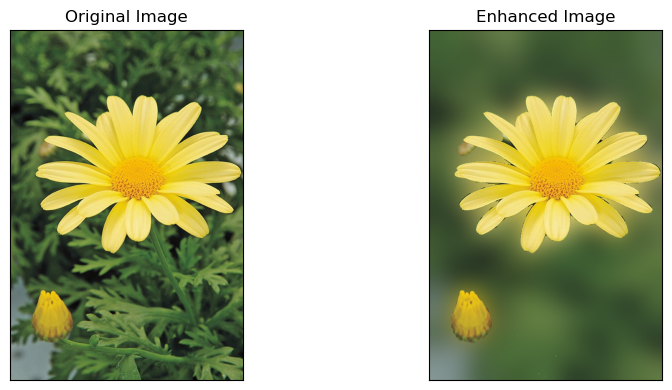

In [2]:
# Load the flower image
image = cv2.imread('images\en3160_assignment_01_Page_4_Image_0001.jpg')

# Apply Gaussian blur to the background of the image
blurred_image = cv2.GaussianBlur(image, (0, 0), 30)

# Combine the blurred background with the original foreground
enhanced_image = np.where(mask2[:, :, np.newaxis] == 1, image, blurred_image)

# Display the original image alongside the enhanced image
plt.figure(figsize=(10, 4))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
plt.title("Enhanced Image"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()


(c) Why is the background just beyond the edge of the flower quite dark in the enhanced image?

 The background just beyond the edge of the flower is quite dark in the enhanced image due to the Gaussian blur applied to the background. The blurring process causes the background pixels to blend together and become darker, creating a smoother transition between the sharp flower and the blurred background. The darkening effect is a result of the weighted average of pixel values caused by the blurring operation.